# California Housing Prices

#### Importing libraries

In [0]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


link = 'https://drive.google.com/open?id=1B2zCLekQlQI-iq7ZBFPaoxrC_5lhUghD'

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1B2zCLekQlQI-iq7ZBFPaoxrC_5lhUghD


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('housing.csv')  
df3 = pd.read_csv('housing.csv')
# Dataset is now stored in a Pandas Dataframe

### Observing the data structure

In [0]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [0]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


_Notice the missing values in total__bedrooms_ 

In [0]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [0]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Std
Standard deviation implies how dispersed values are.It is average of squared deviation from the mean . _In a Normal Distribution,_ 68% of the values lie 1 sigma of the mean, 95% within 2 sigma, and 99.7% within 3 sigma.

#### 25% 50% 75%
These imply values below which a given percentage of numbers fall. 
_ie 25% of the total houses have a age less than 18._

## hist()
We can also use histograms to check distribution of data over a range of values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86f3618eb8>,
      dtype=object)

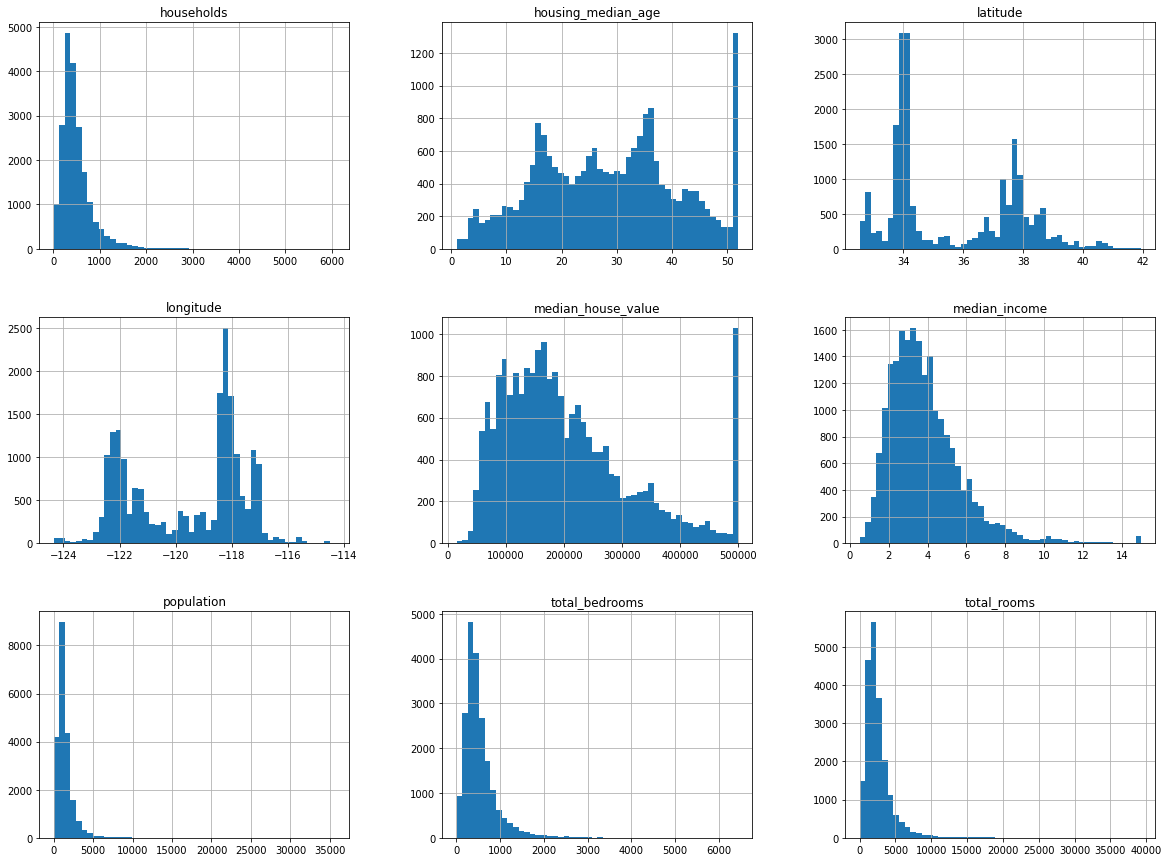

In [0]:
housing.hist(bins=50, figsize=(20,15))

# Create a test set

In [0]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

This type of split is great for large datasets. But in case of smaller datasets, there is a chance that we might introduce a sampling bias.
_For eg in our case we want to ensure that the test case is representative of overall population_

In [0]:
import numpy as np

housing["income_cat"] = np.ceil(housing["median_income"]/1.5) # limit the number of income categories and have discreate values
housing["income_cat"].head()

0    6.0
1    6.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64

In [0]:
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].head() # all the values above 5.0 are replaced by 5.0

0    5.0
1    5.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64

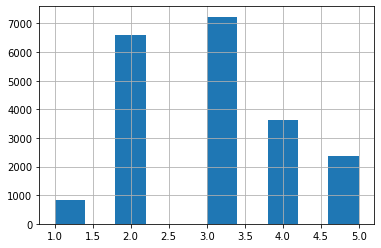

In [0]:
housing["income_cat"].hist()

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#### Income Proportion for full datasets

In [0]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

#### Income Proportion for training-test set generated by stratified split

In [0]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [0]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [0]:
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

## Visualizing Geographical Data

In [0]:
housing = strat_train_set.copy()

#### Scatter plot of longitude and latitude forming map of california

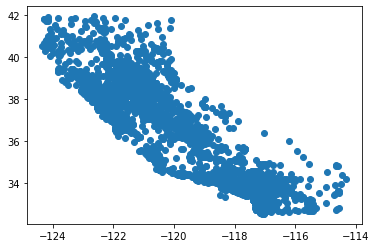

In [0]:
plt.scatter(x=housing['longitude'],y=housing['latitude'])

#### To check Density of houses

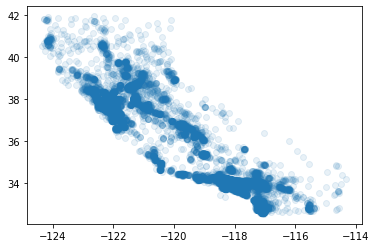

In [0]:
plt.scatter(x=housing['longitude'],y=housing['latitude'], alpha=0.1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


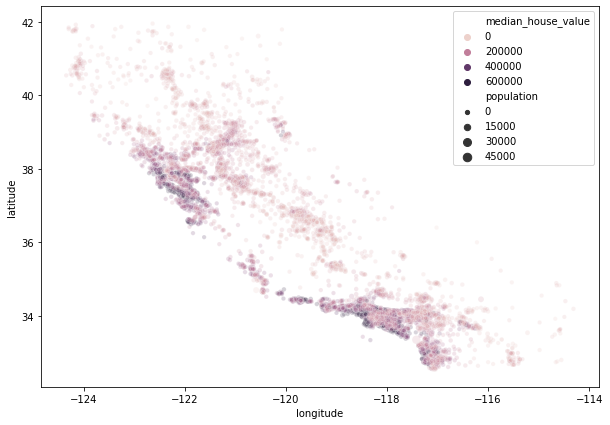

In [0]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.scatterplot(x=housing['longitude'], y=housing['latitude'],
                alpha=0.2, size=housing['population'],
                hue=housing['median_house_value'], legend="brief" )

## Looking for Correlations

In [0]:
cor_mat = housing.corr()
cor_mat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


We only need to check correlation between different attributes and median_house_value

In [0]:
cor_mat['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86e2ce2400>,
      dtype=object)

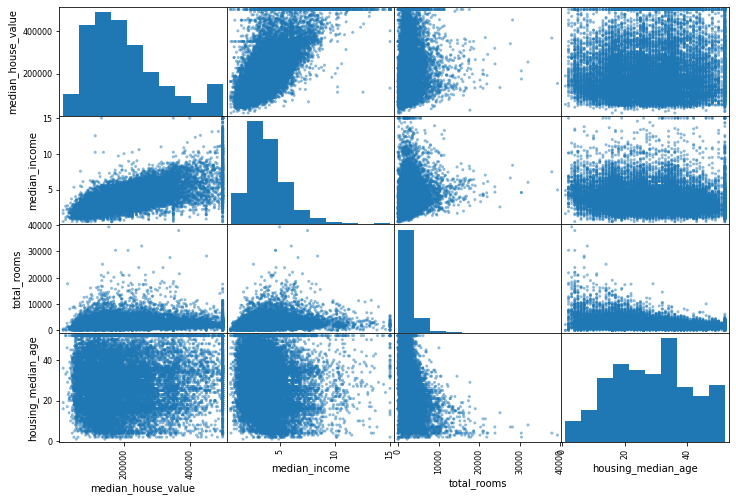

In [0]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age' ]
scatter_matrix(housing[attributes], figsize=(12,8))

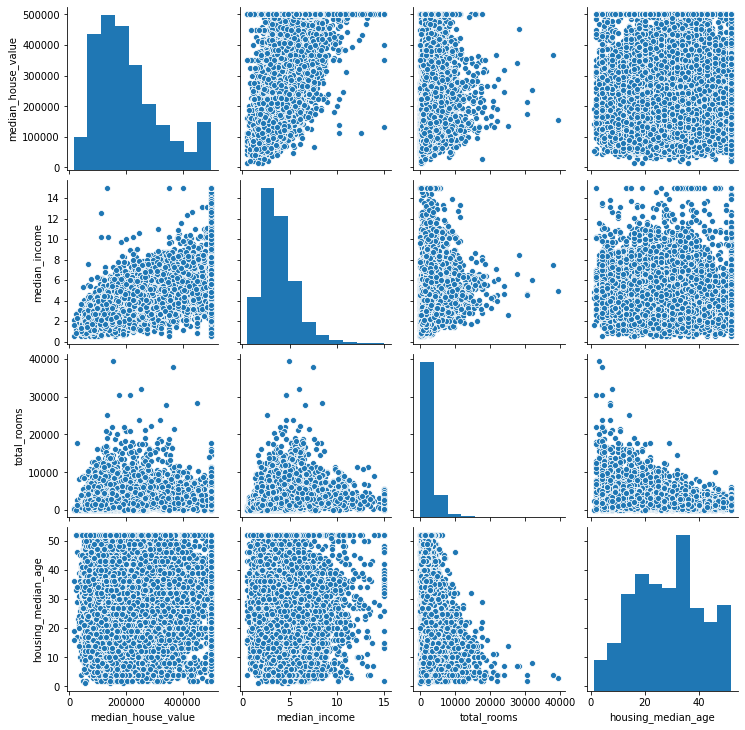

In [0]:
sns.pairplot(housing[attributes], palette='Oranges')

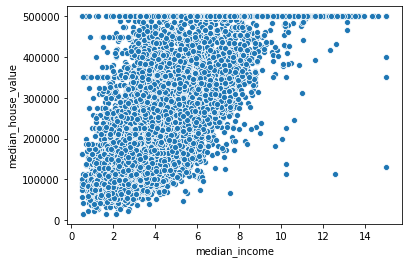

In [0]:
sns.scatterplot(x=housing['median_income'], y=housing['median_house_value'])

We can clearly observe a relation between the house value and the median income

## Attribute Combinations

In [0]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [0]:
cor_matrix = housing.corr()
cor_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

We can notice how bedrooms_per_room are negetively correlated to the median_house_value

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86e0805748>,
      dtype=object)

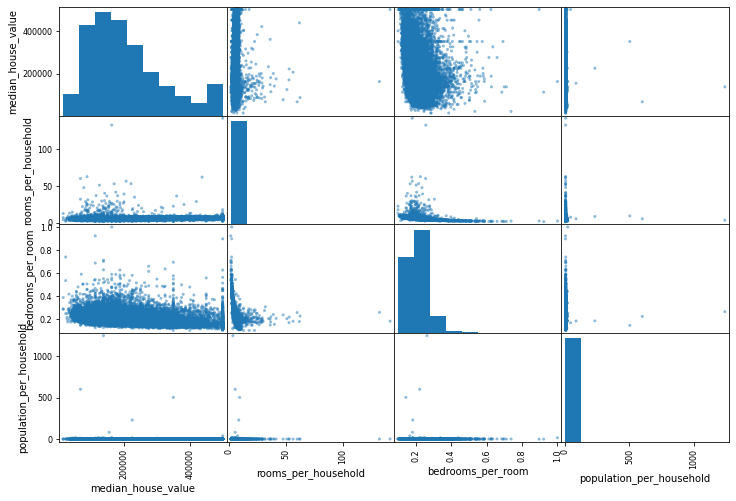

In [0]:
attributes = ['median_house_value', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household' ]
scatter_matrix(housing[attributes], figsize=(12,8))

# Preparing Data For Model

In [0]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### 1. Data Cleaning

- Get rid of the whole attribute
- Remove the rows with missing values
- Remplace the empty/null values( with 0, mean, median or anything)

In [0]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1) # removing non numeric attributes
imputer.fit(housing_num)

imputer.statistics_ 

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Imputer simply calculates and stores the median for each attribute in 'statistics_'

In [0]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [0]:
X = imputer.transform(housing_num)
X # we have got a numpy array

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [0]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns) # converting numpy array to a pandas dataframe

### 2. Categorical Attributes

- Label Encoder

In [0]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [0]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

- OneHotEncoder(Step 2):  to be followed after LabelEncoder

In [0]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

To do the whole transformations in *1* single step use
- LabelBinarizer

In [0]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### Custom Transformers

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6 # storing indexes of the attributes
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, bedrooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

#### 3. Feature Scaling And Transformation Pipelines

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

Feeding Pandas DataFrame directly to our Pipeline

In [0]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [0]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

class MyLabelBinarizer(LabelBinarizer):
    def fit_transform(self, X, y=None):
        return super(MyLabelBinarizer, self).fit_transform(X)
    
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
])

cat_h = cat_pipeline.fit_transform(housing)
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [0]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

housing_prep = full_pipeline.fit_transform(housing)

In [0]:
housing_prep.shape

(16512, 16)

### Training and Evaluating on Training Set

In [0]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prep, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prep = full_pipeline.transform(some_data)
print(lin_reg.predict(some_data_prep), some_labels)

[210745.6703781  318250.78533739 211255.61140243  59219.24255363
 188503.94350055] 17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64


In [0]:
from sklearn.metrics import mean_squared_error
housing_pred = lin_reg.predict(housing_prep)
lin_mse = mean_squared_error(housing_labels, housing_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse # UnderFitted

68789.92137185382

In [0]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prep, housing_labels)
housing_pred = tree_reg.predict(housing_prep)
tree_mse = mean_squared_error(housing_labels, housing_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse #Overfitted

0.0

### Better Evaluation using Cross-Validation

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prep, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())
    
display_scores(tree_rmse_scores)

[70723.29573487 68953.52526018 71767.18929144 72192.84207285
 70825.59848251 74136.32102014 71006.9151744  68703.89396675
 74617.75684777 71771.01352125]
Scores: [70723.29573487 68953.52526018 71767.18929144 72192.84207285
 70825.59848251 74136.32102014 71006.9151744  68703.89396675
 74617.75684777 71771.01352125]
Mean: 71469.83513721687
Standard deviation: 1813.5690721583433


In [0]:
scores = cross_val_score(lin_reg, housing_prep, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [66901.11014878 67121.91885281 71399.05234394 74899.34335616
 67787.35607128 71289.91433224 65119.36466179 68240.11721355
 72440.44994695 67744.92003446]
Mean: 69294.3546961956
Standard deviation: 2887.6750457000703


##### Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prep, housing_labels)

scores = cross_val_score(forest_reg, housing_prep, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores: [50012.69052102 47790.32107972 50445.82246241 52866.38808171
 49789.94877573 53395.79838636 49319.52362569 48089.57452891
 53101.00758025 50570.3076575 ]
Mean: 50538.138269929
Standard deviation: 1898.2015941023258


In [0]:
housing_pred = forest_reg.predict(housing_prep)
forest_mse = mean_squared_error(housing_labels, housing_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse #Overfitted

18924.740854283697

##### SVR model

In [0]:
from sklearn.svm import SVR

svr_model = SVR(gamma='auto')
svr_model.fit(housing_prep, housing_labels)
housing_pred = svr_model.predict(housing_prep)
svr_mse = mean_squared_error(housing_labels, housing_pred)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

118575.95796483167

In [0]:
scores = cross_val_score(svr_model, housing_prep, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
svr_rmse_scores = np.sqrt(-scores)

display_scores(svr_rmse_scores) 

### Fine Tuning models

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8], 'n_jobs': [3]}, 
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(housing_prep, housing_labels)

In [0]:
grid_search.best_params_

In [0]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=3, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [0]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
attributes = num_attribs + extra_attribs + cat_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3439698966099995, 'median_income'),
 (0.10799145024845133, 'pop_per_hhold'),
 (0.0991375304313709, 'bedrooms_per_room'),
 (0.07550420332675552, 'longitude'),
 (0.07029940721220435, 'latitude'),
 (0.045756282202337864, 'housing_median_age'),
 (0.025159886188959937, 'rooms_per_hhold'),
 (0.019754823753231475, 'total_rooms'),
 (0.017937022092714174, 'population'),
 (0.015998634836139607, 'households'),
 (0.015476130221014635, 'total_bedrooms'),
 (0.013538782094825256, 'ocean_proximity')]

### Final Model

In [0]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prep = full_pipeline.transform(X_test)
final_pred = final_model.predict(X_test_prep)

final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

47942.55949358132